In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl

In [14]:
train = pd.read_csv('C:/Users/train.csv')
train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])


stat  =  pd.DataFrame()
for i in range(55875):
    df = train[i].describe()
    stat[i] = df
stat

,0,1,2,3,4,5,6,7,8,9,...,55865,55866,55867,55868,55869,55870,55871,55872,55873,55874
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.467162,0.456730,0.486936,0.508950,0.453143,0.334481,0.346837,0.362295,0.412165,0.370844,...,0.506204,0.491705,0.533213,0.557960,0.611537,0.488108,0.450728,0.506021,0.564559,0.593362
std,0.324179,0.394954,0.395142,0.430719,0.426572,0.416970,0.473661,0.536652,0.524528,0.489112,...,0.360121,0.443312,0.463251,0.409558,0.297357,0.376876,0.471394,0.414989,0.340138,0.252155
min,-0.263715,-0.427287,-0.516127,-0.536545,-0.667206,-0.799536,-0.765995,-0.693420,-0.843329,-0.826591,...,-0.455182,-0.584284,-0.774457,-0.730393,-0.201353,-0.337017,-0.560923,-0.418527,-0.149538,0.141614
25%,0.188668,0.239057,0.265099,0.320646,0.318157,0.112211,0.060491,-0.065908,0.174396,0.057402,...,0.168944,0.448579,0.407924,0.435792,0.526365,0.368931,0.187975,0.243556,0.386957,0.413954
50%,0.555098,0.594037,0.698361,0.676093,0.558642,0.429319,0.358112,0.506752,0.590425,0.505322,...,0.557687,0.650549,0.752839,0.709960,0.754556,0.579876,0.607262,0.632534,0.690577,0.618142
75%,0.673331,0.758942,0.805386,0.834689,0.721777,0.591869,0.753708,0.861153,0.842937,0.678119,...,0.845159,0.793177,0.850063,0.803205,0.806614,0.755595,0.804776,0.843400,0.847068,0.810770
max,0.917480,0.893918,0.902180,0.910266,0.917614,0.954869,0.973667,0.973434,0.954591,0.927918,...,0.870828,0.930292,0.896214,0.911252,0.893380,0.917817,0.937390,0.945463,0.951715,0.943243


In [58]:
mean = sorted(np.array(stat.iloc[1,:].copy()))
stdev = sorted(np.array(stat.iloc[2,:].copy()))
fit1 = stats.norm.pdf(mean, np.mean(mean), np.std(mean))
fit2 = stats.norm.pdf(stdev, np.mean(stdev), np.std(stdev))

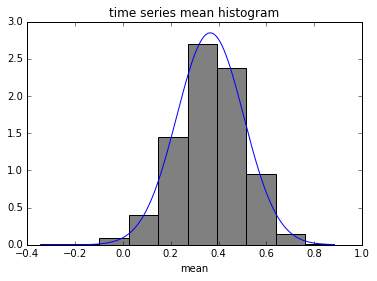

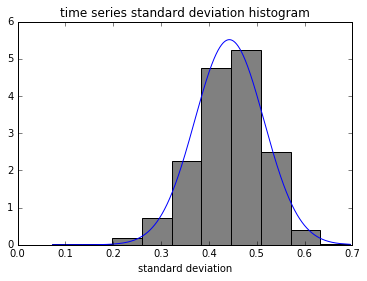

In [68]:
pl.plot(mean,fit1,color='blue')
pl.hist(mean,normed=True,color='grey')
pl.title('time series mean histogram')
pl.xlabel('mean')
pl.show()
pl.close()
pl.plot(stdev,fit2,color='blue')
pl.hist(stdev,normed=True,color='grey')
pl.title('time series standard deviation histogram')
pl.xlabel('standard deviation')
pl.show()
pl.close()

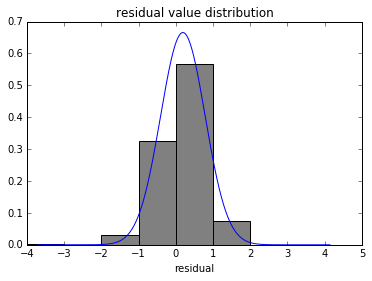

0.13109619686800894 % of the data is out of bound [-2,2]
10.76241610738255 % of the data is out of bound [-1,1]


In [132]:
train = pd.read_csv('C:/Users/train.csv')
train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])
train_melt = sorted(np.array(train.melt()['value']))
fit = stats.norm.pdf(train_melt, np.mean(train_melt), np.std(train_melt))
pl.hist(train_melt,normed=True, color='grey', bins=[-4,-3,-2,-1,0,1,2,3,4,5])
pl.plot(train_melt,fit,color='blue')
pl.title('residual value distribution')
pl.xlabel('residual')
pl.show()
pl.close()

X = [x for x in train_melt if x>2]
Y = [y for y in train_melt if y<-2]
out_of_bound = X + Y
print(str(len(out_of_bound)/11175) +' % of the data is out of bound [-2,2]')

X = [x for x in train_melt if x>1]
Y = [y for y in train_melt if y<-1]
out_of_bound = X + Y
print(str(len(out_of_bound)/11175) +' % of the data is out of bound [-1,1]')

In [120]:
stat = pd.DataFrame()
for i in range(55875):
    df = train[i].describe()
    stat[i] = df
stat

,0,1,2,3,4,5,6,7,8,9,...,55865,55866,55867,55868,55869,55870,55871,55872,55873,55874
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.112433,-0.012682,-0.296012,-0.429620,-0.421717,-0.294388,0.344069,0.103356,-0.150801,0.171079,...,0.057973,-0.096134,0.115473,-0.033881,0.645202,-0.143893,-0.037105,0.052615,0.118800,0.200982
std,0.347823,0.404703,0.393008,0.444426,0.427919,0.399233,0.471884,0.545835,0.537366,0.494291,...,0.360364,0.453438,0.489620,0.427007,0.280772,0.377986,0.468634,0.410857,0.339699,0.247184
min,-0.634920,-0.899981,-1.198185,-1.332061,-1.419446,-1.408509,-0.805831,-0.967589,-1.362291,-1.056479,...,-0.897169,-1.149374,-1.199349,-1.338438,0.097144,-0.947474,-1.024043,-0.857065,-0.596029,-0.265436
25%,-0.174566,-0.273808,-0.517725,-0.589371,-0.582947,-0.543157,0.139741,-0.362161,-0.473207,-0.007712,...,-0.174167,-0.145360,0.033171,-0.170118,0.424406,-0.299130,-0.304563,-0.206523,-0.110097,0.042601
50%,0.174915,0.156692,-0.201619,-0.340101,-0.292072,-0.262238,0.354183,0.290256,0.007767,0.229547,...,0.122044,0.089167,0.205586,0.123319,0.738534,-0.083310,0.091849,0.172912,0.209243,0.224452
75%,0.453590,0.292243,0.023559,-0.124415,-0.155667,-0.025026,0.661175,0.590214,0.295219,0.618684,...,0.380742,0.199084,0.471694,0.242206,0.870317,0.135112,0.318515,0.418118,0.428048,0.388985
max,0.553726,0.417454,0.240954,0.227639,0.126623,0.274256,1.013983,0.732032,0.380028,0.729458,...,0.404091,0.328733,0.545448,0.356524,1.087318,0.349475,0.484578,0.487194,0.510283,0.537278


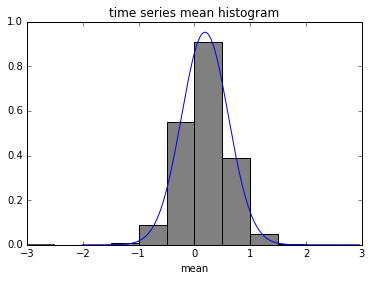

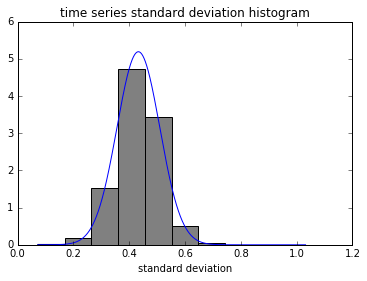

In [124]:
mean = sorted(np.array(stat.iloc[1,:].copy()))
stdev = sorted(np.array(stat.iloc[2,:].copy()))
fit1 = stats.norm.pdf(mean, np.mean(mean), np.std(mean))
fit2 = stats.norm.pdf(stdev, np.mean(stdev), np.std(stdev))

pl.plot(mean,fit1,color='blue')
pl.hist(mean,normed=True,color='grey', bins=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
pl.title('time series mean histogram')
pl.xlabel('mean')
pl.show()
pl.close()
pl.plot(stdev,fit2,color='blue')
pl.hist(stdev,normed=True,color='grey')
pl.title('time series standard deviation histogram')
pl.xlabel('standard deviation')
pl.show()
pl.close()